In [1]:
!pip install nltk
!pip install wordcloud


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
#NLP packages
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud


In [4]:
# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [5]:
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 14, 6
plt.style.use('ggplot')


In [7]:
# Reading data to csv file
AR = pd.read_csv('https://media.githubusercontent.com/media/juliandariomirandacalle/NLP_Notebooks/master/01-Introduction_NLP/Customer_Reviews.csv')
AR.head(7)

,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...


In [8]:
AR["Text"][21]

'I bought these for my husband who is currently overseas. He loves these, and apparently his staff likes them also.<br />There are generous amounts of Twizzlers in each 16-ounce bag, and this was well worth the price. <a href="http://www.amazon.com/gp/product/B001GVISJM">Twizzlers, Strawberry, 16-Ounce Bags (Pack of 6)</a>'

In [11]:
#removing html tags
import re
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result
AR['Text']=AR['Text'].apply(lambda cw : remove_tags(cw))

In [12]:
AR["Text"][21]

'I bought these for my husband who is currently overseas. He loves these, and apparently his staff likes them also.There are generous amounts of Twizzlers in each 16-ounce bag, and this was well worth the price. Twizzlers, Strawberry, 16-Ounce Bags (Pack of 6)'

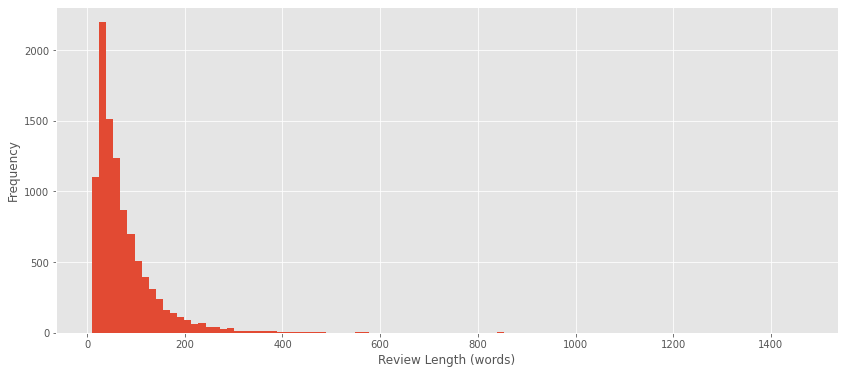

Average words: 76.7921
Skewness: 4.586382624124858


In [13]:
## Getting the number of words by splitting them by a space
words_per_review = AR.Text.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 100)
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.show()

print('Average words:', words_per_review.mean())  #78
print('Skewness:', words_per_review.skew())  #4.6  which means the number of words per user review is highly positive skewed with mean of 78


In [14]:
#Distribution of rating from 1 to 5
Rating_dis_percent = 100 * AR['Score'].value_counts()/len(AR)
Rating_dis_percent


5    61.83
4    14.33
1     9.32
3     8.62
2     5.90
Name: Score, dtype: float64

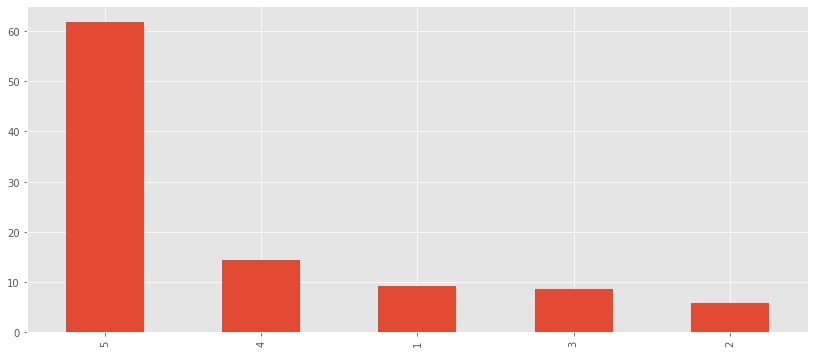

In [15]:
#Lets plot it
Rating_dis_percent.plot.bar()
plt.show()                 # there are more no of 5's and least no of 3,2,1 so lets split the rating 


In [16]:
#Mapping the ratings
AR['Sentiment_rating'] = np.where(AR.Score > 3,1,0)


In [17]:
## Removing neutral reviews 
AR = AR[AR.Score != 3]

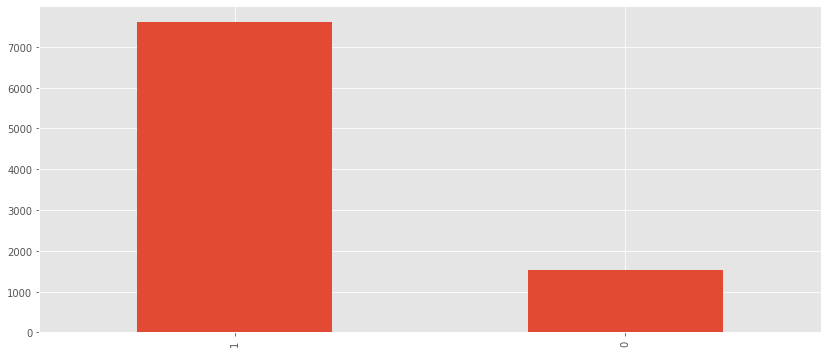

In [18]:
# Printing the counts of each class
AR['Sentiment_rating'].value_counts()
#ploting
AR.Sentiment_rating.value_counts().plot.bar()
plt.show()

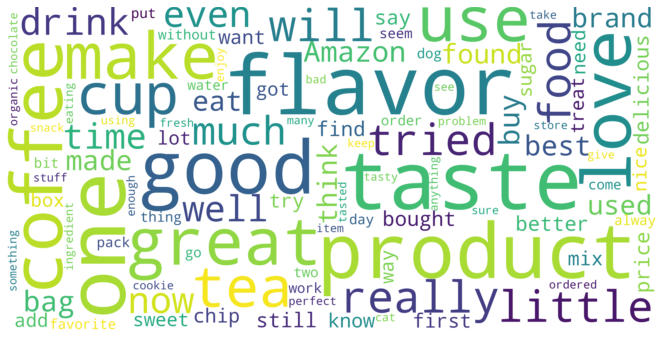

In [19]:
#Text visualization using word clouds
word_cloud_text = ''.join(AR['Text'])

wordcloud = WordCloud(max_font_size=100,  # Maximum font size for the largest word
                      max_words=100,     # The maximum number of words
                      background_color="white", # Background color for the word cloud image
                      scale = 10, # Scaling between computation and drawing
                      width=800, # Width of the canvas
                      height=400 # Height of the canvas
                     ).generate(word_cloud_text)

plt.figure()
plt.imshow(wordcloud,interpolation="bilinear") # to make the displayed image appear more smoothly
plt.axis("off")
plt.show()


In [20]:
#Pre processing
#Converting words to upper/lower case 
AR['text_new'] = AR['Text'].str.lower()


In [24]:
#analyzing no of unique word usimg word tokenize
import nltk
nltk.download('punkt')
from nltk import word_tokenize


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [25]:
# For reviews not converted to lower case
token_lists = [word_tokenize(each) for each in AR['Text']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens then: ",len(set(tokens)))


Number of unique tokens then:  29585


In [26]:
# For reviews converted to lower case
token_lists_lower = [word_tokenize(each) for each in AR['text_new']]
tokens_lower = [item for sublist in token_lists_lower for item in sublist]
print("Number of unique tokens now: ",len(set(tokens_lower)))



Number of unique tokens now:  24673


In [27]:
#Removing special charecters
## Selecting non alpha numeric charactes that are not spaces
spl_chars = AR['text_new'].apply(lambda review:[char for char in list(review) 
                                                    if not char.isalnum() and char != ' '])

In [28]:
## Getting list of list into a single list
flat_list = [item for sublist in spl_chars for item in sublist]

## Unique special characters
set(flat_list)

#Let's remove these special characters from the reviews by applying a regular expression:
review_backup = AR['text_new'].copy()
AR['Text_new'] = AR['text_new'].str.replace(r'[^A-Za-z0-9 ]+', ' ')


In [29]:
#We can see how our reviews change after removing these:
print("- Old Review -")
print(review_backup.values[8])
print("\n- New Review -")
print(AR['Text_new'][8])

- Old Review -
right now i'm mostly just sprouting this so my cats can eat the grass. they love it. i rotate it around with wheatgrass and rye too

- New Review -
right now i m mostly just sprouting this so my cats can eat the grass  they love it  i rotate it around with wheatgrass and rye too


In [30]:
#unique tokens before and after removing special charecters
token_lists = [word_tokenize(each) for each in AR['Text']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens then: ",len(set(tokens)))

Number of unique tokens then:  29585


In [31]:
token_lists = [word_tokenize(each) for each in AR['Text_new']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens now: ",len(set(tokens)))           #here unique tokens dropped further


Number of unique tokens now:  18437


In [32]:
#stopwords removing
from nltk.corpus import stopwords
nltk.download('stopwords')

print('Available languages for NLTK v.3.4.5: ')
print(stopwords.fileids())
noise_words = []
eng_stop_words = stopwords.words('english')
eng_stop_words

stop_words = set(eng_stop_words)
without_stop_words = []
stopword = []

def stopwords_removal(stop_words, sentence):
    return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]

AR['reviews_text_nonstop'] = AR['Text_new'].apply(lambda row: stopwords_removal(stop_words, row))
AR[['Text_new','reviews_text_nonstop']]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Available languages for NLTK v.3.4.5: 
['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


,Text_new,reviews_text_nonstop
0,i have bought several of the vitality canned d...,"[bought, several, vitality, canned, dog, food,..."
1,product arrived labeled as jumbo salted peanut...,"[product, arrived, labeled, jumbo, salted, pea..."
2,this is a confection that has been around a fe...,"[confection, around, centuries, light, pillowy..."
3,if you are looking for the secret ingredient i...,"[looking, secret, ingredient, robitussin, beli..."
4,great taffy at a great price there was a wid...,"[great, taffy, great, price, wide, assortment,..."
...,...,...
9995,we switched from the advance similac to the or...,"[switched, advance, similac, organic, product,..."
9996,like the bad reviews say the organic formula ...,"[like, bad, reviews, say, organic, formula, co..."
9997,i wanted to solely breastfeed but was unable t...,"[wanted, solely, breastfeed, unable, keep, sup..."
9998,i love the fact that i can get this delieved t...,"[love, fact, get, delieved, house, delievy, ch..."


In [34]:
#Building a machine learning model

AR[['Text','Score','Sentiment_rating']].head(10)

#bag of words using counter vectoriation
#the following code creates a word document matrix
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(AR['Text_new'])
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()




,00,000,0003,000kwh,002,008,0100,0174,02,03,0303,032,03510,04,042608460503serving,0472066978,04830,05,06,062,07,0738551856,09,090,0g,0gcholesterol,0gprotein,0mg,0mgsodium,0sodium,0xk6hzpjrkaed855hewpin,0z,10,100,1000,100calories,100ml,100s,100x,101,...,zapp,zareba,zeal,zealand,zen,zero,zerocholesterol,zerosodium,zest,zesty,zevia,zhena,zico,ziggies,zilch,zin,zinc,zinfandels,zing,zinging,zip,ziploc,ziplock,zipper,zippy,zito,ziwipeak,zn,zojirushi,zola,zomg,zon,zoo,zoom,zotz,zucchini,zuke,zukes,zupas,zuppa
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
#Let's use this to create a bag of words from the reviews, excluding the noise words we identified earlier:
### Creating a python object of the class CountVectorizer

bow_counts = CountVectorizer(tokenizer= word_tokenize, # type of tokenization
                             stop_words=noise_words, # List of stopwords
                             ngram_range=(1,1)) # number of n-grams

bow_data = bow_counts.fit_transform(AR['Text_new'])

bow_data


<9138x18437 sparse matrix of type '<class 'numpy.int64'>'
	with 489692 stored elements in Compressed Sparse Row format>

###Once the bag of words is prepared, the dataset should be divided into training and test sets:


In [36]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data, # Features
                                                                    AR['Sentiment_rating'], # Target variable
                                                                    test_size = 0.25, # 25% test size
                                                                    random_state = 0) # random state for replication purposes
y_test_bow.value_counts()/y_test_bow.shape[0]



1    0.845077
0    0.154923
Name: Sentiment_rating, dtype: float64

In [37]:
#Applying logistic regression
#Let's train the model on our training data and run the resulting model on our test data:
# Training the model 
lr_model_all = LogisticRegression()           # Logistic regression
lr_model_all.fit(X_train_bow, y_train_bow)   # Fitting a logistic regression model


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
## Predicting the output
test_predall = lr_model_all.predict(X_test_bow)   # Class prediction

In [40]:
## Calculate key performance metrics
print("F1 score: ", f1_score(y_test_bow, test_predall))   


F1 score:  0.9525762624967957


Let's modify the set of features in the model to include bigrams, trigrams, and 4-grams:
Changes with respect to the previous code
1. Increasing the n-grams from just having 1-gram to (1-gram, 2-gram, 3-gram, and 4-gram)
2. Including the stopwords in the bag of words features


In [42]:
bow_counts = CountVectorizer(tokenizer= word_tokenize,
                             ngram_range=(1,4))

bow_data = bow_counts.fit_transform(AR.Text_new)
bow_data


<9138x1251124 sparse matrix of type '<class 'numpy.int64'>'
	with 2493785 stored elements in Compressed Sparse Row format>

In [43]:
X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(bow_data,
                                                                    AR['Sentiment_rating'],
                                                                    test_size = 0.25,
                                                                    random_state = 0)


In [44]:
# Defining and training the model
lr_model_all_new = LogisticRegression(max_iter = 200)
lr_model_all_new.fit(X_train_bow, y_train_bow)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
# Predicting the results
test_predall = lr_model_all_new.predict(X_test_bow)

print("F1 score: ", f1_score(y_test_bow,test_predall))    #The F1-score has jumped slightly


F1 score:  0.9522132796780685


#TF-IDF model
Let's re-featurize our original set of reviews based on TF-IDF and split the resulting features into train and test sets:


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

### Creating a python object of the class CountVectorizer
tfidf_counts = TfidfVectorizer(tokenizer= word_tokenize, # type of tokenization
                               stop_words=noise_words, # List of stopwords
                               ngram_range=(1,1)) # number of n-grams

tfidf_data = tfidf_counts.fit_transform(AR['Text_new'])

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(tfidf_data,
                                                                            AR['Sentiment_rating'],
                                                                            test_size = 0.25,random_state = 0)




#Applying logistic regression to TF-IDF features
Let's apply logistic regression to the features created from TF-IDF:



In [47]:
#Setting up the model class
lr_model_tf_idf = LogisticRegression()

In [48]:
## Training the model 
lr_model_tf_idf.fit(X_train_tfidf,y_train_tfidf)

## Prediciting the results
test_predall = lr_model_tf_idf.predict(X_test_tfidf)

## Evaluating the model
print("F1 score: ",f1_score(y_test_bow, test_predall))    #93.6%  (when compared to  bag of words ,tf-idf f1 score was slightly decreased )


F1 score:  0.9370731707317073


###As we see a slight differnce between the td-idf and bag of words..
###Tf-idf gave 94% with less dimension.. so we consider tf-idf as a good 
